In [14]:
import pandas as pd
import numpy as np
import glob
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier

In [2]:
# 读取训练集和测试集数据
train_files = glob.glob("../recsys2023_data/train/*.csv")
train_data = pd.concat([pd.read_csv(file, sep='\t') for file in train_files])
test_data = pd.read_csv("../recsys2023_data/test/000000000000.csv",sep='\t')

In [3]:
X_train = train_data.iloc[:, 1:-2]  # Exclude the first column (RowId) and the last two columns (labels)
y_click = train_data["is_clicked"]
y_install = train_data["is_installed"]
X_test = test_data.iloc[:,1:] # Remove RowId

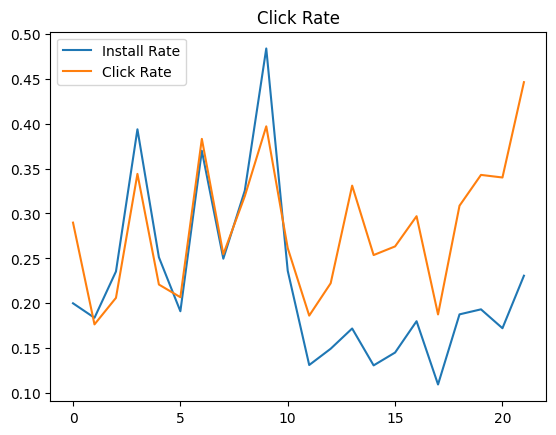

In [4]:
# 统计date和y_install之间的数据分布
date = X_train.iloc[:,0]
# print(date.value_counts(sort=True))
test_date = X_test.iloc[:,0]
# print(test_date.value_counts(sort=True))
date_install = pd.concat([date, y_install], axis=1)
date_install.columns = ["date", "y_install"]
d_i = date_install.value_counts(sort=False)
di_ls = []
for i in range(22):
    temp = []
    temp.append(d_i.iloc[i*2])
    temp.append(d_i.iloc[i*2+1])
    di_ls.append(temp)
di_rate = []
for i in range(22):
    di_rate.append(di_ls[i][1]/di_ls[i][0])
plt.plot(di_rate)
plt.title("Install Rate")


# 统计date和y_click之间的数据分布
date = X_train.iloc[:,0]
# print(date.value_counts(sort=True))
test_date = X_test.iloc[:,0]
# print(test_date.value_counts(sort=True))
date_click = pd.concat([date, y_click], axis=1)
date_click.columns = ["date", "y_click"]
d_c = date_click.value_counts(sort=False)
dc_ls = []
for i in range(22):
    temp = []
    temp.append(d_c.iloc[i*2])
    temp.append(d_c.iloc[i*2+1])
    dc_ls.append(temp)
dc_rate = []
for i in range(22):
    dc_rate.append(dc_ls[i][1]/di_ls[i][0])
plt.plot(dc_rate)
plt.title("Click Rate")
plt.legend(["Install Rate", "Click Rate"])

In [5]:
X_train

,f_1,f_2,f_3,f_4,f_5,f_6,f_7,f_8,f_9,f_10,...,f_70,f_71,f_72,f_73,f_74,f_75,f_76,f_77,f_78,f_79
0,51,6581,22294,5491,25604,14597,27941,18800,31372,22970,...,2.828680,1.142243,3.997850,1.713364,0.115692,1.156922,0.269948,0.0,0.0,0.0
1,49,20095,563,22861,15908,22651,27941,21218,869,19343,...,0.000000,0.000000,0.000000,0.000000,0.115692,1.156922,0.269948,0.0,0.0,0.0
2,51,20095,563,22861,25604,22651,27941,21218,31372,22970,...,0.000000,0.000000,0.000000,0.000000,0.038564,1.156922,0.269948,0.0,0.0,0.0
3,64,13658,22294,7003,25604,29975,27941,21218,21533,19343,...,1.598379,0.000000,1.713364,1.142243,0.115692,1.156922,0.269948,0.0,0.0,0.0
4,62,20095,563,31686,15908,590,27941,18800,23218,22970,...,0.000000,0.000000,0.000000,0.000000,0.115692,1.156922,0.269948,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115915,62,12577,22294,2059,25604,18309,27941,21218,23218,19343,...,1.860286,0.000000,0.000000,0.000000,0.000000,0.231384,0.000000,0.0,0.0,0.0
115916,45,27426,22294,11338,21545,25991,27941,19203,6675,22970,...,0.787752,0.000000,1.142243,0.000000,0.000000,1.156922,0.269948,0.0,0.0,0.0
115917,56,26325,22294,9018,25604,943,27941,21218,869,19343,...,1.955192,0.000000,1.142243,0.000000,0.115692,1.156922,0.269948,0.0,0.0,0.0
115918,48,31824,22294,6036,19475,9209,27941,19203,23218,21574,...,2.273288,0.000000,2.284486,1.713364,0.000000,1.156922,0.269948,0.0,0.0,0.0


In [6]:
# 统计X_train每列和y_install之间的相关性
X_train_install = pd.concat([X_train, y_install], axis=1)
f_cor = X_train_install.corr()["is_installed"]

In [7]:
# 将f_cor中的数据按绝对值大小排序
f_cor_abs = abs(f_cor)
# 保留绝对值大于0.02的特征
f_cor_abs = f_cor_abs[f_cor_abs > 0.02]
# 得到保留的特征名，按照原来f_cor的顺序排列
f_cor_abs_name = f_cor_abs.index
# # 去掉is_installed和f_1
f_cor_abs_name = f_cor_abs_name.drop("is_installed")
f_cor_abs_name = f_cor_abs_name.drop("f_1")
print(len(f_cor_abs_name))
f_cor_abs_name

40


Index(['f_2', 'f_3', 'f_4', 'f_6', 'f_8', 'f_10', 'f_11', 'f_12', 'f_14',
       'f_16', 'f_17', 'f_19', 'f_20', 'f_21', 'f_22', 'f_23', 'f_24', 'f_25',
       'f_32', 'f_34', 'f_35', 'f_37', 'f_40', 'f_41', 'f_42', 'f_48', 'f_49',
       'f_50', 'f_51', 'f_55', 'f_56', 'f_57', 'f_58', 'f_59', 'f_65', 'f_68',
       'f_69', 'f_72', 'f_78', 'f_79'],
      dtype='object')

In [8]:
# 在X_train中保留f_cor_abs_name中的特征
X_train_select = X_train[f_cor_abs_name]
X_test_select = X_test[f_cor_abs_name]
all_data = pd.concat([X_train_select,X_test_select])
size_ls = []
for i in f_cor_abs_name:
    size = all_data[i].value_counts().shape[0]
    size_ls.append(size)
print(size_ls)

[139, 5, 638, 5234, 6, 3, 24, 26, 19, 12, 49, 19, 57, 35, 26, 4, 4, 3, 4, 2, 2, 2, 2, 2, 8882, 27, 20, 34, 1828, 389, 220, 516, 1810, 1593, 1718, 465, 379, 11, 13, 7]


In [12]:
print(X_train_select.shape)

(3485852, 40)


In [35]:
X_train, X_val, y_train, y_val = train_test_split(X_train_select, y_install, test_size=0.15, stratify=y_install)
install_model = XGBClassifier(n_estimators=200,
                            max_depth=5,
                            reg_lambda=0.3,
                            reg_alpha=2,
                            learning_rate=0.15,
                            eval_metric="logloss",
                            early_stopping_rounds=10)
evalset = [(X_train, y_train), (X_val, y_val)]
install_model.fit(X=X_train, y=y_train, eval_set=evalset, verbose=0)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=10,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.15, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, predictor=None, random_state=None, ...)

In [36]:
install_probability = install_model.predict_proba(X_test_select)

In [37]:
result = pd.DataFrame(install_probability[:,1])
# 将结果保存为txt文件
result.to_csv("install_result2.txt", index=False, header=False)
# 读取txt文件


In [38]:
test_data = pd.read_csv("../recsys2023_data/test/000000000000.csv",sep='\t')
RowId = test_data.iloc[:,0]
i = 0
with open('./click_result.txt', 'r') as f1, \
open('./install_result1.txt', 'r') as f2,\
open('result2.txt', 'w') as r:
    r.write("RowId\tis_clicked\tis_installed\n")
    for line1, line2 in zip(f1, f2):
        # 将 line1 和 line2 整合成新的一行
        r.write(str(RowId[i])+'\t')
        r.write(line1.strip() +'\t'+ line2.strip() + '\n')
        i+=1